In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

In [21]:
import matplotlib.pyplot as plt
import seaborn
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

In [7]:
import twosigmafunc

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
train = pd.read_hdf('train.h5')

In [5]:
markers = [ 'o', 'v', 's','*', ',', '+', 'x', '2', '3', 'D', '|', '*', ',']

In [6]:
excl = ['id', 'timestamp', 'y']
cols_origin = [col for col in train.columns if col not in ['y']]
feature_origin = [col for col in train.columns if col not in excl]
feature_diff = [col + '_diff' for col in feature_origin]

# Add differs 

In [8]:
# add time series diff
train.fillna(train.median(), inplace=True)
d_mean = train.median()
train.sort_values(['id', 'timestamp'], inplace=True)
train['id_diff'] = train.id.diff()
d_mean['id_diff'] = 0.0
for col in feature_origin:
    train[col + '_diff'] = train[col].diff()
    d_mean[col + '_diff'] = 0.0

train.loc[train.id_diff!=0, feature_diff] = 0

In [9]:
train['y_past'] = train.y.shift()
train['tec20-30'] = train.technical_20 - train.technical_30
train['tec123'] = train['tec20-30'] + train.technical_13
train['tec123_diff'] = train.tec123.diff()
train['tec20-30_diff'] = train['tec20-30'].diff()
train.loc[train.id_diff != 0, ['tec123_diff', 'tec20-30_diff', 'y_past']] = 0

In [15]:
min_stamp = X_test.timestamp.min()
max_stamp = X_test.timestamp.max()

# Trivariate Analyse

In [ ]:
feature_cols

In [ ]:
reward_lr_tri = {}
model = lr
for i in range(1, len(feature_cols) - 2):
    for j in range(i + 1, len(feature_cols) - 1):
        for k in range(j + 1, len(feature_cols)):
            feature = [feature_cols[i], feature_cols[j], feature_cols[k]]
            model.fit(X_train.loc[y_is_within_cut, feature], y_train.loc[y_is_within_cut])
            pred = model.predict(X_test[feature]).clip(low_y_cut, high_y_cut)
            r = R_score(pred, y_test)
            reward_lr_tri[(feature_cols[i], feature_cols[j], feature_cols[k])] = r
            print(feature_cols[i], feature_cols[j], feature_cols[k], 'R_score', r)

In [ ]:
reward_lr_tri = sort_dict(reward_lr_tri, key=lambda x : x[1])

In [ ]:
reward_lr_tri = sorted(reward_lr_tri, key=lambda x : x[1], reverse=True)

In [ ]:
tri_comb = [x[0] for x in reward_lr_tri if x[1] > 0.029]

In [16]:
tri_comb = [('tec123_diff', 'tec20-30', 'technical_30_diff'),
 ('tec123', 'tec123_diff', 'technical_30_diff'),
 ('technical_43_diff', 'tec123', 'technical_20_diff'),
 ('tec123', 'tec20-30', 'technical_20_diff'),
 ('tec123', 'tec123_diff', 'technical_20_diff'),
 ('tec123_diff', 'tec20-30', 'technical_20_diff'),
 ('technical_43_diff', 'tec20-30', 'technical_20_diff'),
 ('y_past', 'tec123', 'technical_20_diff'),
 ('technical_43', 'tec123', 'technical_20_diff'),
 ('y_past', 'tec20-30', 'technical_20_diff'),
 ('technical_43', 'tec20-30', 'technical_20_diff'),
 ('tec123', 'tec20-30_diff', 'technical_20_diff'),
 ('tec123', 'tec20-30_diff', 'technical_30_diff'),
 ('tec123', 'technical_20_diff', 'technical_30_diff'),
 ('tec20-30', 'technical_20_diff', 'technical_30_diff'),
 ('tec20-30', 'tec20-30_diff', 'technical_20_diff'),
 ('tec20-30', 'tec20-30_diff', 'technical_30_diff')]

In [18]:
reward_lr_tri = defaultdict(list)
model = lr
for feature in tri_comb:
    features = list(feature)
    model.fit(X_train.loc[y_is_within_cut, features], y_train.loc[y_is_within_cut])
    stamp = min_stamp
    y_true_acc = []
    y_pred_acc = []
    while stamp <= max_stamp:
        test = X_test.loc[X_test.timestamp == stamp, features]
        y_true = y_test.loc[X_test.timestamp == stamp]
        y_pred = model.predict(test)
    #         print(y_true.shape, y_pred.shape)
        y_true_acc.extend(list(y_true))
        y_pred_acc.extend(list(y_pred))
        r = twosigmafunc.R_score(np.array(y_pred_acc), np.array(y_true_acc))
        reward_lr_tri[feature].append(r)
        stamp += 1
    print('Processing', features, 'R_score', r)

Processing ['tec123_diff', 'tec20-30', 'technical_30_diff'] R_score 0.0310142533901
Processing ['tec123', 'tec123_diff', 'technical_30_diff'] R_score 0.030728819792
Processing ['technical_43_diff', 'tec123', 'technical_20_diff'] R_score 0.029900678466
Processing ['tec123', 'tec20-30', 'technical_20_diff'] R_score 0.0298290869863
Processing ['tec123', 'tec123_diff', 'technical_20_diff'] R_score 0.0298120870567
Processing ['tec123_diff', 'tec20-30', 'technical_20_diff'] R_score 0.0297197558691
Processing ['technical_43_diff', 'tec20-30', 'technical_20_diff'] R_score 0.0297066814378
Processing ['y_past', 'tec123', 'technical_20_diff'] R_score 0.0296924471449
Processing ['technical_43', 'tec123', 'technical_20_diff'] R_score 0.029687275892
Processing ['y_past', 'tec20-30', 'technical_20_diff'] R_score 0.0295896728541
Processing ['technical_43', 'tec20-30', 'technical_20_diff'] R_score 0.0294952970439
Processing ['tec123', 'tec20-30_diff', 'technical_20_diff'] R_score 0.0291709116515
Proces

(-0.03, 0.035)

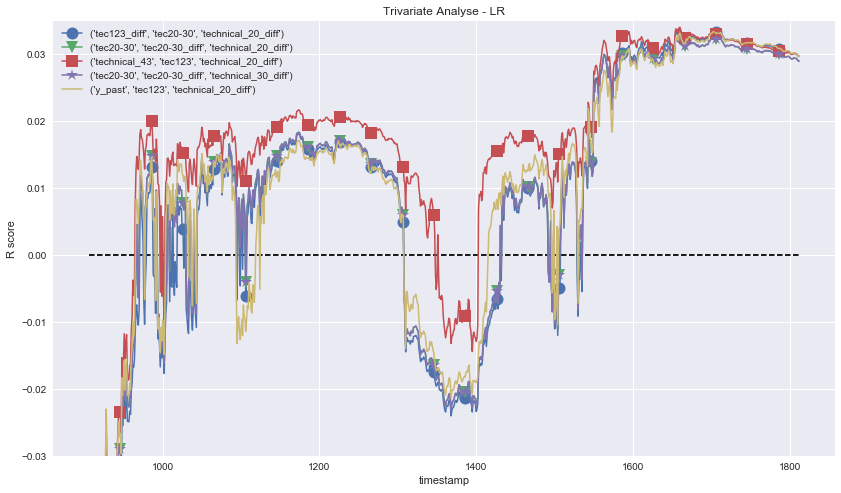

In [23]:
plt.title('Trivariate Analyse - LR')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([min_stamp, max_stamp], [0, 0], 'k--')
for ind, key in enumerate(list(reward_lr_tri.keys())[:5]):
    plt.plot(range(min_stamp, max_stamp + 1), np.array(reward_lr_tri[key]) ,lw=1.5, marker=markers[ind], markersize=12, markevery=40, label=key)
plt.legend(loc='best')
plt.ylim(-0.03, 0.035)

tec43, tec123, tec_20_diff best

(-0.05, 0.035)

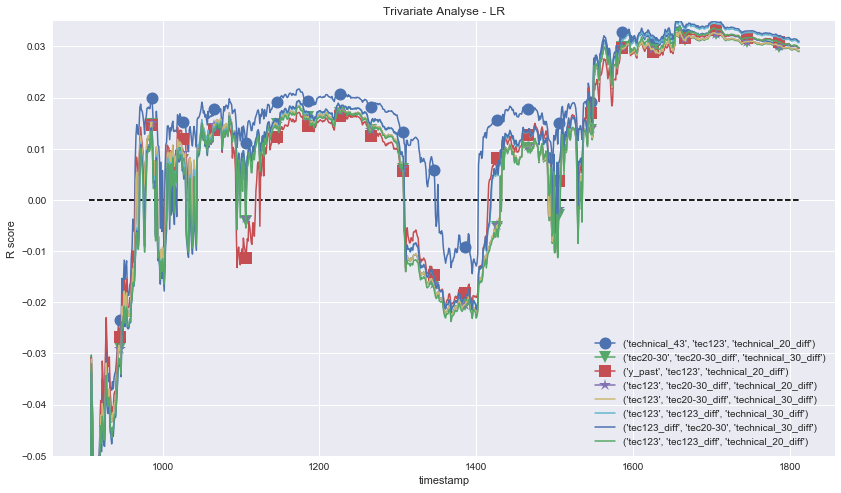

In [30]:
plt.title('Trivariate Analyse - LR')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([min_stamp, max_stamp], [0, 0], 'k--')
for ind, key in enumerate(list(reward_lr_tri.keys())[2:10]):
    plt.plot(range(min_stamp, max_stamp + 1), np.array(reward_lr_tri[key]) ,lw=1.5, marker=markers[ind], markersize=12, markevery=40, label=key)
plt.legend(loc='best')
plt.ylim(-0.05, 0.035)

(-0.05, 0.035)

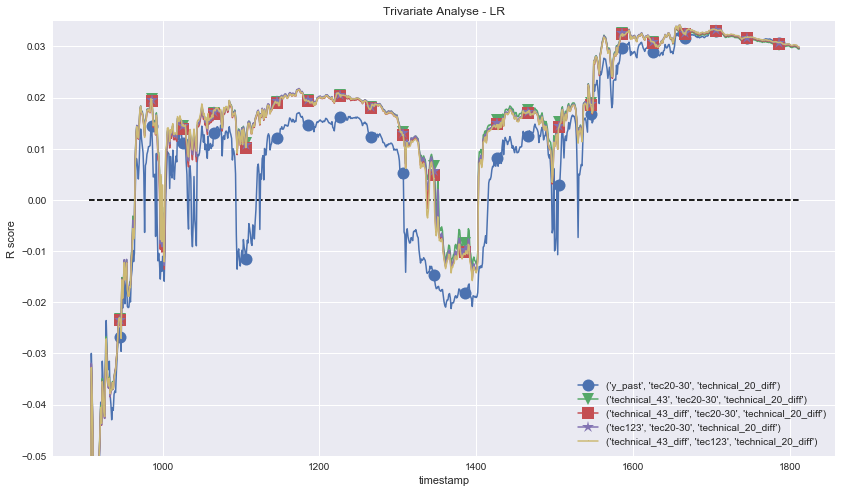

In [27]:
plt.title('Trivariate Analyse - LR')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([min_stamp, max_stamp], [0, 0], 'k--')
for ind, key in enumerate(list(reward_lr_tri.keys())[10:15]):
    plt.plot(range(min_stamp, max_stamp + 1), np.array(reward_lr_tri[key]) ,lw=1.5, marker=markers[ind], markersize=12, markevery=40, label=key)
plt.legend(loc='best')
plt.ylim(-0.05, 0.035)

(-0.05, 0.035)

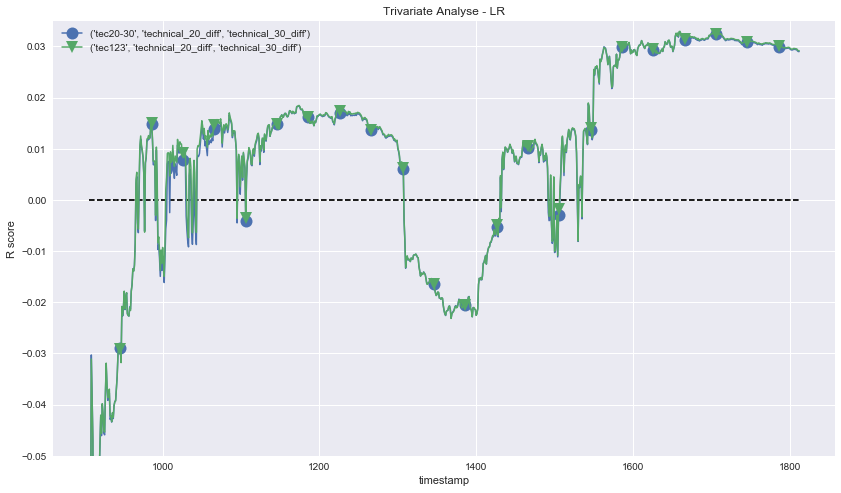

In [28]:
plt.title('Trivariate Analyse - LR')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([min_stamp, max_stamp], [0, 0], 'k--')
for ind, key in enumerate(list(reward_lr_tri.keys())[15:]):
    plt.plot(range(min_stamp, max_stamp + 1), np.array(reward_lr_tri[key]) ,lw=1.5, marker=markers[ind], markersize=12, markevery=40, label=key)
plt.legend(loc='best')
plt.ylim(-0.05, 0.035)

In [31]:
candidates = [('technical_43', 'tec123', 'technical_20_diff'),
             ('technical_43_diff', 'tec20-30', 'technical_20_diff'),
              ('tec20-30', 'tec20-30_diff', 'technical_30_diff')
             ]

(-0.05, 0.035)

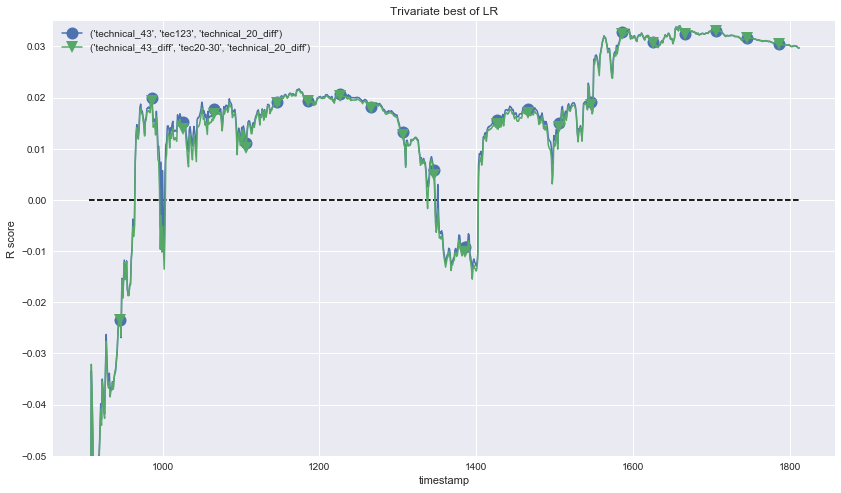

In [33]:
plt.title('Trivariate best of LR')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([min_stamp, max_stamp], [0, 0], 'k--')
for ind, key in enumerate(candidates[:-1]):
    plt.plot(range(min_stamp, max_stamp + 1), np.array(reward_lr_tri[key]) ,lw=1.5, marker=markers[ind], markersize=12, markevery=40, label=key)
plt.legend(loc='best')
plt.ylim(-0.05, 0.035)

(-0.05, 0.035)

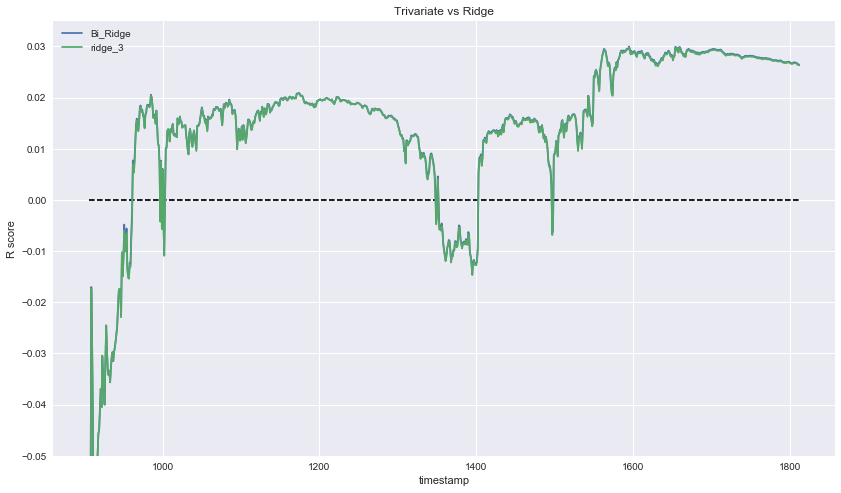

In [52]:
plt.title('Trivariate vs Ridge')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([min_stamp, max_stamp], [0, 0], 'k--')
# for ind, key in enumerate(candidates[1:-1]):
#     plt.plot(range(min_stamp, max_stamp + 1), np.array(reward_lr_tri[key][:907]) ,lw=1.5, marker=markers[ind], markersize=12, markevery=40, label=key)
# plt.plot(range(min_stamp, max_stamp + 1), lr_results.Ridge)
plt.plot(range(min_stamp, max_stamp + 1), lr_results.Bi_Ridge)
plt.plot(range(min_stamp, max_stamp + 1), reward_lr_tri[('technical_43_diff', 'tec20-30', 'technical_20_diff')][907:], label='ridge_3')
plt.legend(loc='best')
plt.ylim(-0.05, 0.035)

In [41]:
reward_ridge_tri = defaultdict(list)
model = Ridge()
for feature in candidates[1:-1]:
    features = list(feature)
    model.fit(X_train.loc[y_is_within_cut, features], y_train.loc[y_is_within_cut])
    stamp = min_stamp
    y_true_acc = []
    y_pred_acc = []
    while stamp <= max_stamp:
        test = X_test.loc[X_test.timestamp == stamp, features]
        y_true = y_test.loc[X_test.timestamp == stamp]
        y_pred = model.predict(test)
    #         print(y_true.shape, y_pred.shape)
        y_true_acc.extend(list(y_true))
        y_pred_acc.extend(list(y_pred))
        r = twosigmafunc.R_score(np.array(y_pred_acc), np.array(y_true_acc))
        reward_lr_tri[feature].append(r)
        stamp += 1
    print('Processing', features, 'R_score', r)

Processing ['technical_43_diff', 'tec20-30', 'technical_20_diff'] R_score 0.0263288237417


In [34]:
lr_results = pd.read_csv('Linear_R_score.csv')

In [35]:
lr_results.head()

,Unnamed: 0,Bi_Ridge,LR,Mixed_model,Ridge,timestamp
0,0,-0.199228,-0.186395,-0.189450,-0.189450,906
1,1,-0.130472,-0.123510,-0.125910,-0.125910,907
2,2,-0.062324,-0.075748,-0.067650,-0.067650,908
3,3,-0.017021,-0.045951,-0.034686,-0.034686,909
4,4,-0.027521,-0.046525,-0.036888,-0.036888,910


In [ ]:
lr_results['TriLr'] = 

In [ ]:
results = pd.DataFrame({'timestamp':range(min_stamp, max_stamp + 1), 
                        'Bi_Ridge': reward_ridge_bi[('tec20-30', 'technical_20_diff')],
                        'LR': reward['technical_20_diff'], 
                        'Ridge': reward_ridge['technical_20_diff'],
                        'Mixed_model': reward_mixed})

In [ ]:
import json
with open('js.json', 'w') as f:
    json.dump(reward_lr_tri, f)

# Predicting Rewards 
although reward can be used as flag to indicate which Ridge model to involve, however, in submit model, we can not get reward before we hand in our predictions, so let's predict reward now

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
etr = ExtraTreesRegressor(n_estimators=128, n_jobs=-1, max_depth=5, max_features=0.6,
                          min_samples_leaf=20, random_state=11)